In [142]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans


In [143]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [144]:
df=df.rename(columns={"Unnamed: 0":"States"})

In [145]:
df.head()


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [147]:
df1=df.iloc[:,1:]
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [159]:
df1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [162]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]),columns=['Murder', 'Assault', 'UrbanPop', 'Rape','cluster'])
scaled_df

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,-1.298813
1,0.513019,1.118060,-1.224067,2.509424,2.119116
2,0.072361,1.493817,1.009122,1.053466,-1.298813
3,0.234708,0.233212,-1.084492,-0.186794,0.410152
4,0.281093,1.275635,1.776781,2.088814,2.119116
5,0.025976,0.402909,0.869548,1.883901,-1.298813
6,-1.040880,-0.736484,0.799761,-1.092723,0.410152
7,-0.437875,0.815030,0.450825,-0.585834,0.410152
8,1.765415,1.990786,1.009122,1.150530,2.119116
9,2.229265,0.487757,-0.386621,0.492653,-1.298813


In [163]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
 4   cluster   50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


[250.0, 142.34481072766215, 102.15481365850192, 77.27887576230597, 61.93094514539353, 53.01592320344438, 45.252873507322015, 40.32155613634467, 35.8153849638329]


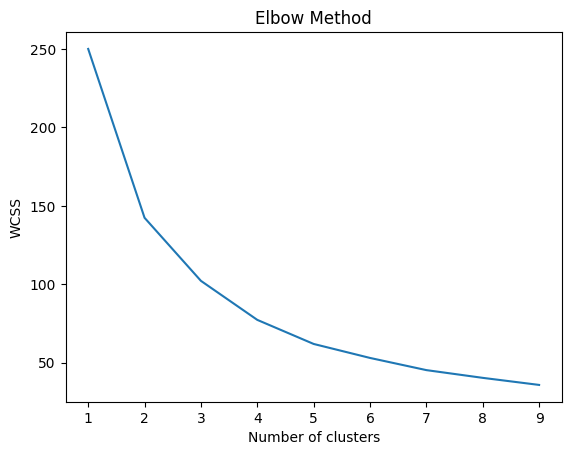

In [164]:
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [165]:
from sklearn.cluster import KMeans
clusters_new=KMeans(3)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3)

In [166]:
clusters_new.labels_

array([1, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [167]:
set(clusters_new.labels_)

{0, 1, 2}

In [168]:
df['clusterid_new']=clusters_new.labels_
df

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [169]:
df.sort_values(by="clusterid_new")

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
49,Wyoming,6.8,161,60,15.6,0
35,Oklahoma,6.6,151,68,20.0,0
29,New Jersey,7.4,159,89,18.8,0
28,New Hampshire,2.1,57,56,9.5,0
36,Oregon,4.9,159,67,29.3,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
37,Pennsylvania,6.3,106,72,14.9,0
22,Minnesota,2.7,72,66,14.9,0


In [170]:
clusters_new.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591,  0.41015156],
       [ 1.03340078,  0.88018102,  0.24146355,  0.74474931, -1.29881326],
       [ 0.94208023,  1.59987733,  0.03210209,  1.29882209,  2.11911637]])

In [171]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.87000,114.433333,63.633333,15.943333
1,1,12.24375,243.375000,69.000000,28.137500
2,2,11.85000,302.750000,66.000000,33.275000


In [174]:
df[df['clusterid_new']==0]

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [175]:
df[df['clusterid_new']==1]

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
2,Arizona,8.1,294,80,31.0,1
5,Colorado,7.9,204,78,38.7,1
9,Georgia,17.4,211,60,25.8,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
23,Mississippi,16.1,259,44,17.1,1
24,Missouri,9.0,178,70,28.2,1


In [176]:
from sklearn.metrics import silhouette_score
score=silhouette_score(scaled_df,clusters_new.labels_,metric='euclidean')
score

0.46810132589182873

In [177]:
df1=pd.DataFrame()
df1['cluster_id']=clusters_new.labels_
df1

,cluster_id
0,1
1,2
2,1
3,0
4,2
5,1
6,0
7,0
8,2
9,1
